In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


## Data exploration and preparation

>#### load 'A_Z Handwritten Data.csv' dataset

In [107]:
df = pd.read_csv('A_Z Handwritten Data.csv')

In [108]:
# get copy from the original to preprocess

df_pre = df.copy()

In [109]:
# get information about the dataset

display(df_pre.describe())


print("-"*80)


# to know the number of the rows
print(f"total records:",len(df), "\n")


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


--------------------------------------------------------------------------------
total records: 372450 



>#### Identify the number of unique classes and show their distribution.


Unique classes : 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
--------------------------------------------------------------------------------
Counts : 
 [13869  8668 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586
 12336 19010 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272
 10859  6076]
--------------------------------------------------------------------------------


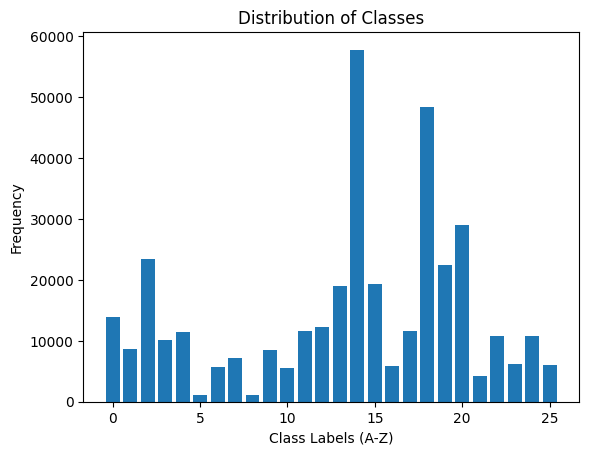

In [110]:
# We know that the fisrt column is the target 
# contains numbers from 0 to 25 (A-Z).

# Count the frequency of each letter
# df_pre["0"] to get the first column as its name is "0" from the above information
unique_classes, counts = np.unique(df_pre["0"], return_counts=True)

print("Unique classes : \n" ,unique_classes)
print("-"*80)

print("Counts : \n" ,counts)

print("-"*80)

# show the distribution
plt.bar(unique_classes, counts)
plt.title("Distribution of Classes")
plt.xlabel("Class Labels (A-Z)")
plt.ylabel("Frequency")
plt.show()


>#### Normalize each image. 


In [111]:
# Normalize images
# divide by 255 to make the data between 0 and 1
df_normalized = df_pre.astype("float32") / 255.0


>#### Reshape the flattened vectors to reconstruct and display the corresponding images while testing the models. 

In [112]:

# Separate the target column (first column)
# we get it from the original dataset not from the normalized dataset 
# iloc[Rows , Columns] , ":" means all records , "0" mean the first column 
df_targets = df_pre.iloc[:, 0].values  

# Extract the image data (columns 2 to 785) and reshape each row into 28x28
# iloc[Rows , Columns] , ":" means all records , "1:" mean the second column to the last column 
# the data already is 2d array so the "images" will be 3d array 
# as in each index will contain 2d array ( 28 X 28 ) 
# "-1" automatically calculates the number of images based on the total data size. 
# mean will return the number of rows
df_images = df_normalized.iloc[:, 1:].values.reshape(-1, 28, 28)  


print("Images shape:", df_images.shape)

print("-"*80)

# the firts image in 2d array   
print(df_images[0])


Images shape: (372450, 28, 28)
--------------------------------------------------------------------------------
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0. 

>#### Letters Visualization

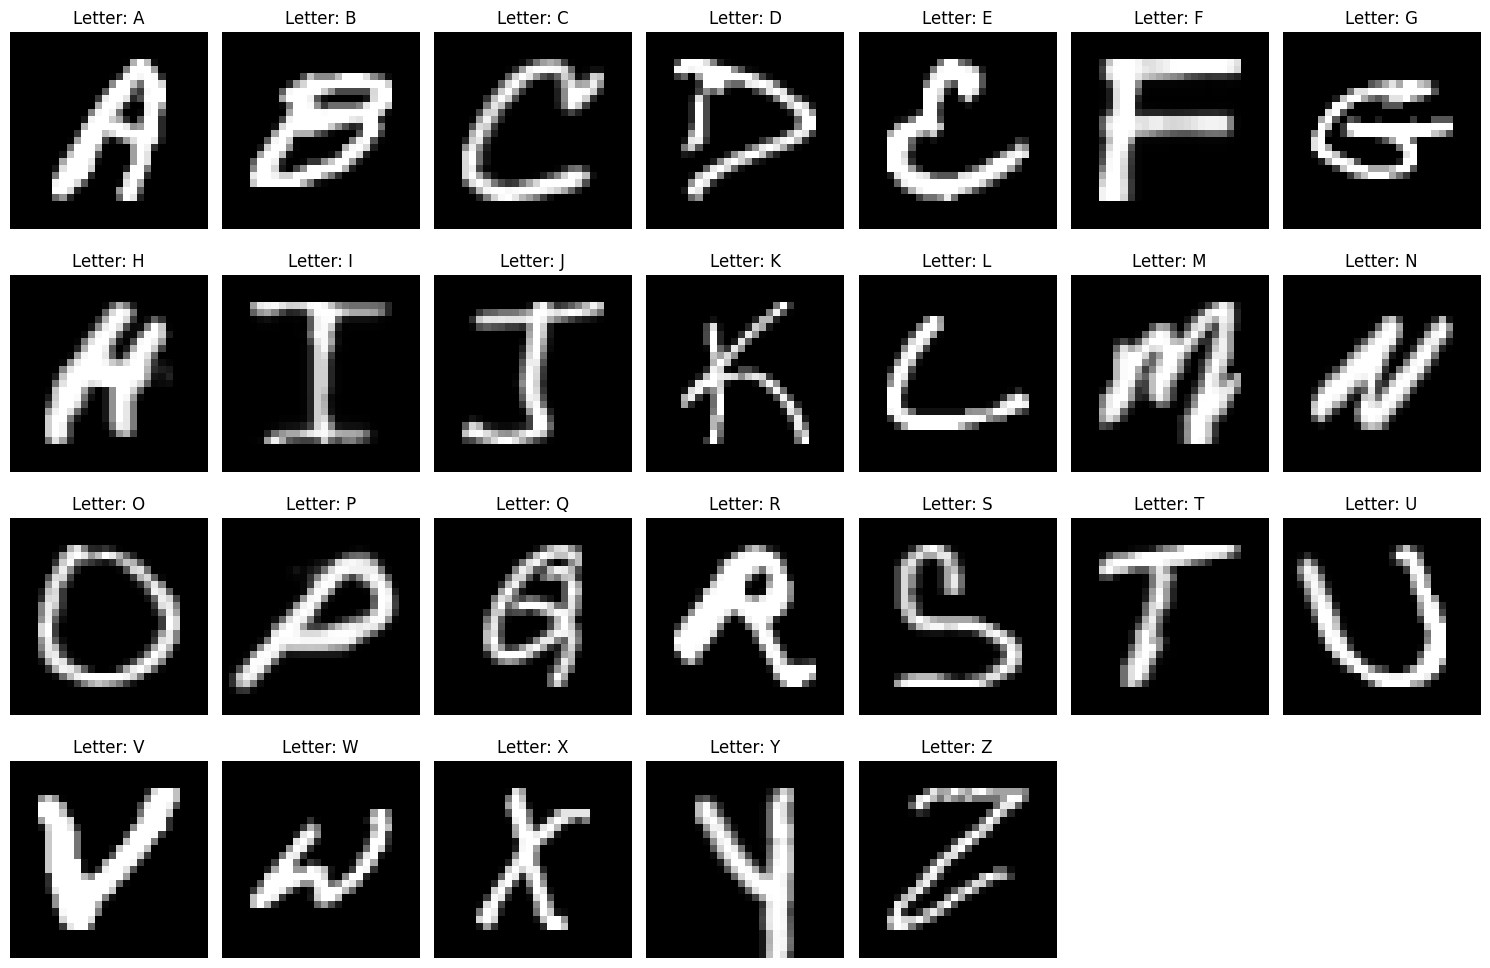

In [113]:
# we have the unique classes and its counts 
# we need cumulative sum to get index that represents each letter
# Create list from the cumulative sum as the following
# sum(count[:i]) means sum the counts from the first index to the i index
cumulative_counts = [sum(counts[:i]) for i in range(len(counts) + 1)]  


# Create a figure for displaying all letters
plt.figure(figsize=(15, 10))

# Loop through all 26 letters
for i, letter in enumerate(unique_classes):
    # Get the starting index for the current letter
    idx = cumulative_counts[i] 

    # Create a grid of 4 rows and 7 columns for visualization 
    plt.subplot(4, 7, i + 1)  
    
    # Display the image using "imshow" that used to display data as an image on a 2D
    plt.imshow(df_images[idx], cmap='gray')  

    # Show the letter as character not as number
    # "ord" get the ASCII representation then add the letter number 
    # then convert to character using casting "chr"
    plt.title(f"Letter: {chr(letter + ord('A'))}") 

    # Hide axes 
    plt.axis("off")  

plt.tight_layout()
plt.show()

>#### Split the data into training and testing datasets

In [114]:

# make the 80% from the data training set and 20% from the data testing set
# random state to ensure that the split return the same data each run


# The final data will be worked on
df_images_train, df_images_test, df_targets_train, df_targets_test = train_test_split(df_images, df_targets, test_size=0.2, random_state=42) 



# Ensure that the training set and testing set contains all the unique classes

targets_train_unique_classes = np.unique(df_targets_train)

print("No. Of Unique classes in targets train : \n" ,len(targets_train_unique_classes) )
print("-"*80)

targets_test_unique_classes = np.unique(df_targets_test)

print("No. Of Unique classes in targets test : \n" ,len(targets_test_unique_classes) )
print("-"*80)



No. Of Unique classes in targets train : 
 26
--------------------------------------------------------------------------------
No. Of Unique classes in targets test : 
 26
--------------------------------------------------------------------------------
